In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle/

In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 426M/428M [00:20<00:00, 24.5MB/s]
100% 428M/428M [00:20<00:00, 22.2MB/s]


In [5]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Import Library

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils


Load Dataset


In [7]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')
len(paths)

Dataset is loaded


2800

In [8]:
paths[:5]
labels[:5]
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()
df['label'].value_counts()
df['label_count']= df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

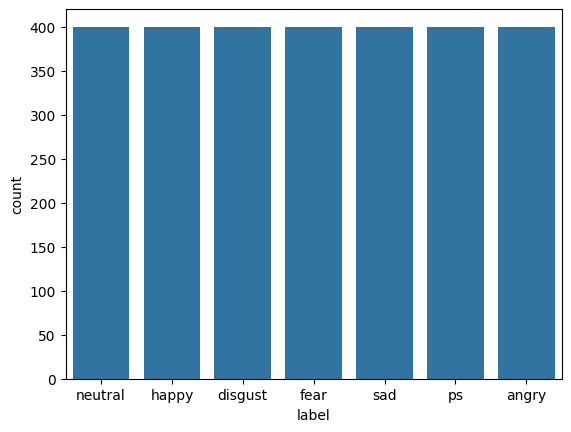

In [9]:
df.drop('label_count', axis = 1)
df.info()
sns.countplot(data=df, x='label')

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()



In [11]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [12]:
print(df.head())
print(df['label'].unique())

                                              speech    label  label_count
0  /content/tess toronto emotional speech set dat...  neutral          NaN
1  /content/tess toronto emotional speech set dat...  neutral          NaN
2  /content/tess toronto emotional speech set dat...  neutral          NaN
3  /content/tess toronto emotional speech set dat...  neutral          NaN
4  /content/tess toronto emotional speech set dat...  neutral          NaN
['neutral' 'happy' 'disgust' 'fear' 'sad' 'ps' 'angry']


In [13]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_whip_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_pick_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_cab_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_hate_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_witch_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_five_angry.wav'],
      dtype=object)

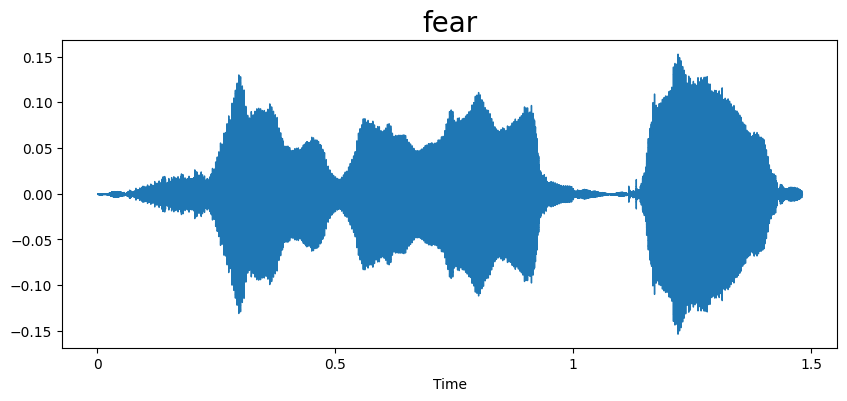

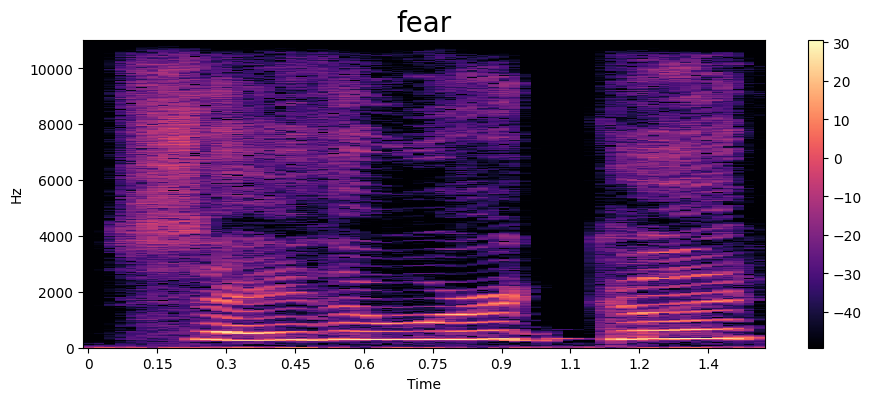

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

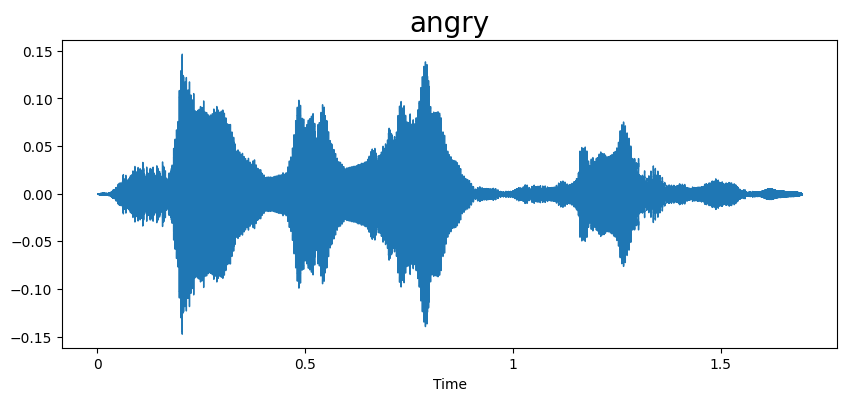

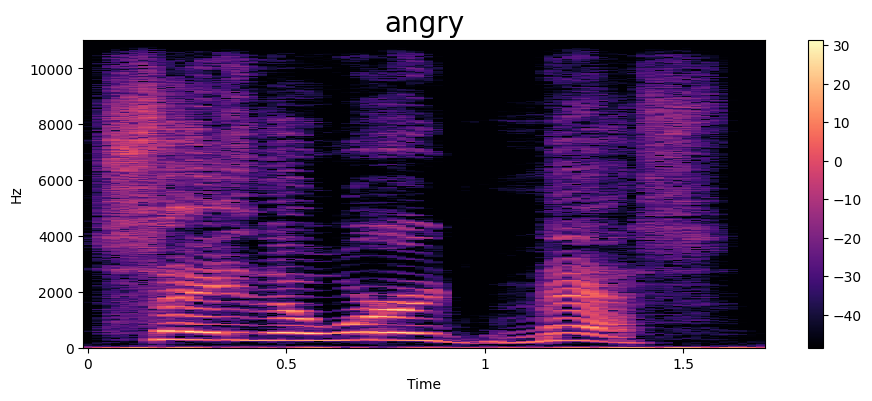

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

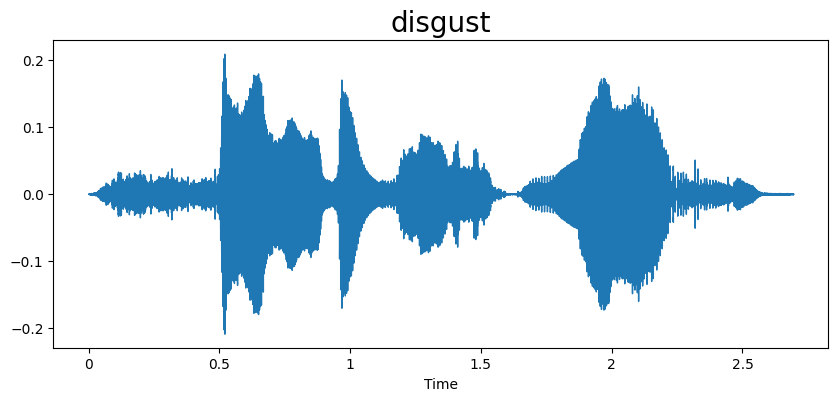

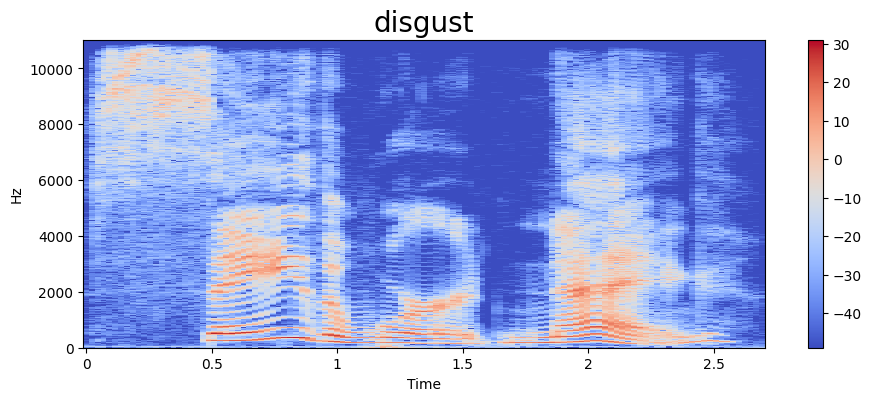

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

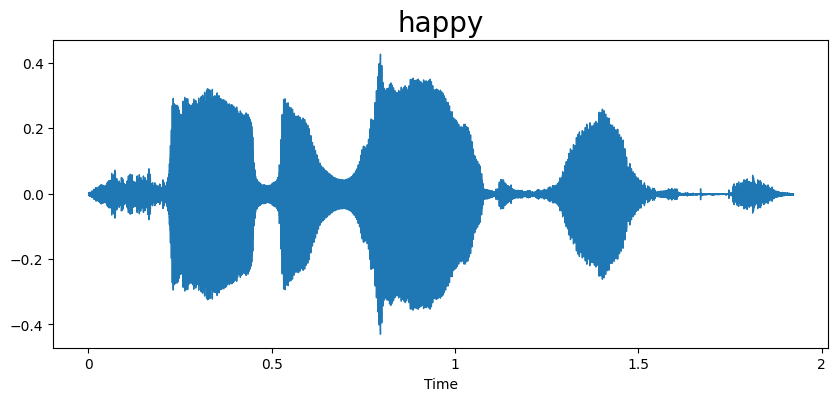

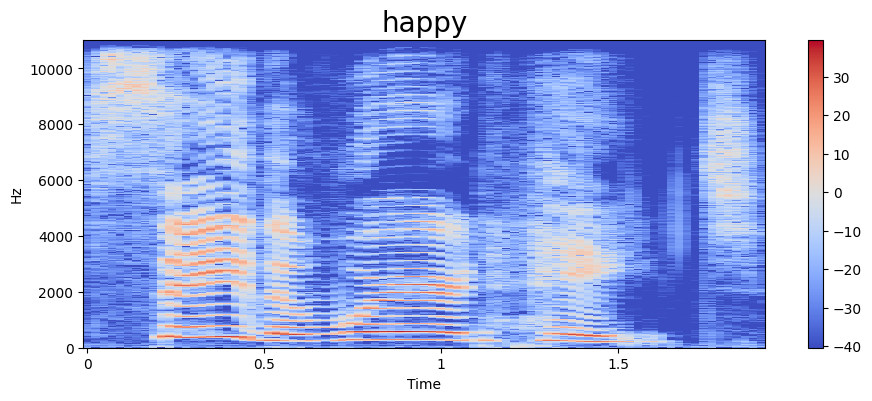

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feture Extraction

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-516.17395   ,  118.05267   ,   20.563543  ,  -10.627628  ,
         15.998082  ,    8.408817  ,   -7.8787417 ,  -13.695235  ,
        -16.731539  ,   -5.2510757 ,  -16.408566  ,   -1.1465538 ,
         -6.458231  ,   -1.5915091 ,    9.184478  ,    7.1938562 ,
         -4.573815  ,    8.367326  ,   -0.8352696 ,   -0.75882417,
          4.1085157 ,    2.7140713 ,   -5.7502623 ,   -0.9648934 ,
        -14.950684  ,    0.5872322 ,   -5.9033537 ,   -2.8635027 ,
         -4.613906  ,   -3.0346427 ,  -11.336647  ,   -4.8528805 ,
         -5.646607  ,    6.3802624 ,   27.411139  ,   39.462296  ,
         44.86537   ,   37.02169   ,   16.98022   ,    7.9109616 ],
      dtype=float32)

In [20]:
x_fmcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
x_fmcc

,speech
0,"[-516.17395, 118.05267, 20.563543, -10.627628,..."
1,"[-538.53253, 97.268715, 22.71904, 5.3827276, 2..."
2,"[-489.92874, 93.41434, 7.407959, -1.220029, 13..."
3,"[-484.1545, 90.76992, 14.422699, -21.314335, 4..."
4,"[-483.50302, 77.119736, 23.282988, -5.228358, ..."
...,...
2795,"[-391.04715, 50.146027, 7.1237454, 16.528553, ..."
2796,"[-335.92084, 23.997925, 2.5902214, 8.827275, -..."
2797,"[-318.4119, 31.05064, -2.8924277, 21.296827, -..."
2798,"[-344.0832, 34.09715, -7.421969, 17.877495, -2..."


In [22]:
x = [x for x in x_fmcc]
x = np.array(x)
x.shape

(2800, 40)

In [23]:
## input split
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape

(2800, 7)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Create the LSTM Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64) # Changed X_train to x_train, y_train to y_train, X_val to x_test and y_val to y_test.
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2101 - loss: 1.9007 - val_accuracy: 0.6214 - val_loss: 1.0706
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5157 - loss: 1.1959 - val_accuracy: 0.7875 - val_loss: 0.6055
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6931 - loss: 0.7693 - val_accuracy: 0.8393 - val_loss: 0.3865
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8172 - loss: 0.5385 - val_accuracy: 0.9179 - val_loss: 0.2018
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8673 - loss: 0.4128 - val_accuracy: 0.9375 - val_loss: 0.1621
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8979 - loss: 0.3473 - val_accuracy: 0.9089 - val_loss: 0.3131
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9008 - loss: 0.3557 - val_accuracy: 0.9500 - val_loss: 0.1273
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.1966 - val_accuracy: 0.9679 - val_

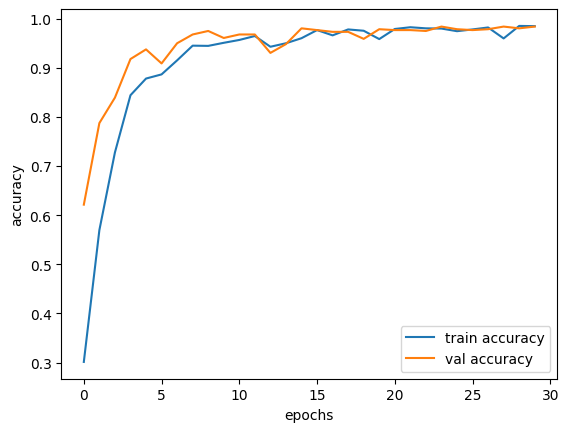

In [31]:
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']


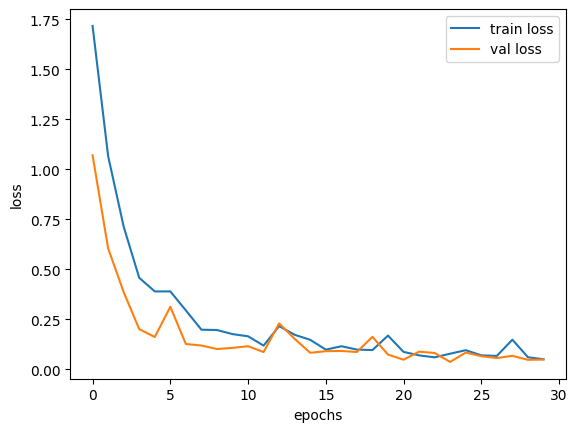

In [32]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(x_test) # Changed X_val to x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(x_test, axis=1)
from sklearn.metrics import confusion_matrix, classification_report

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [37]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)


In [38]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  0  0  0  0]
 [72 92 76 73 74 81 81  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  3  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]]


In [40]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad','surprise'] # Added 'surprise to the list
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
     disgust       1.00      0.17      0.29       549
        fear       0.00      0.00      0.00         0
       happy       0.06      0.50      0.11        10
     neutral       0.00      0.00      0.00         0
          ps       0.00      0.00      0.00         0
         sad       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         1

    accuracy                           0.17       560
   macro avg       0.13      0.08      0.05       560
weighted avg       0.98      0.17      0.28       560



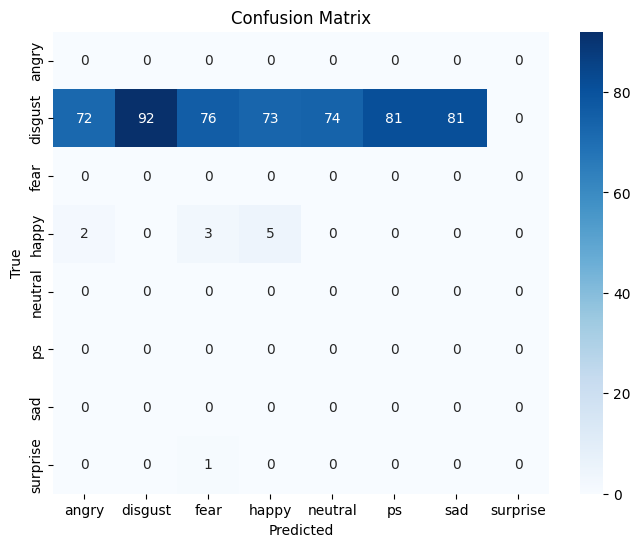

In [41]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()